In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Industries'), 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-04-26 to 2019-07-10 - 62


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

47


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
GDX,47,2.371555,4.152241,0.561594,23.004703,6.075660
XAR,47,0.823244,1.717476,0.456228,7.967665,2.579733
GDXJ,47,2.050037,4.631458,0.434065,19.189909,6.657301
IHI,47,0.925257,2.058893,0.430122,9.039028,4.510425
IGF,47,0.540641,1.384602,0.361807,5.171904,2.242252
IXJ,47,0.585231,1.632188,0.334244,5.581665,3.337207
EMLP,47,0.480709,1.340681,0.328957,4.914264,2.697335
XLU,47,0.579079,1.775711,0.303763,5.812185,3.237646
VPU,47,0.561846,1.725412,0.302631,5.589871,3.258989


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted IGF 0.812 0.364
evicted GUNR 0.828 0.227
evicted RYT 0.884 0.177
evicted EMLP 0.831 0.215
evicted FXU 0.861 0.128
evicted XLU 0.699 0.085
evicted XLP 0.780 0.076
evicted XLB 0.721 0.235
evicted XLY 0.861 0.098
evicted IYF 0.797 0.017
evicted ITB 0.613 -0.082
evicted ARKK 0.766 0.030
evicted XLC 0.643 -0.074
evicted XBI 0.620 0.020
evicted XAR 0.750 0.276
retry backlogs ['VPU', 'VGT', 'FHLC', 'VAW', 'VFH', 'FNCL', 'FTEC', 'VDC', 'VHT', 'IGM', 'VOX', 'IYH', 'XLF', 'VCR', 'XT', 'IYG', 'GDXJ', 'FXL', 'FXH', 'XLV', 'GNR', 'ITA', 'FBT', 'FDN', 'IGV', 'IXN', 'XLK', 'IBB', 'IXJ'] at 0.905/-0.51 - 0.676
evicted GNR 0.831 0.222
evicted ITA 0.748 0.180
evicted VAW 0.787 0.232
evicted VCR 0.828 0.072
evicted VDC 0.710 0.048
evicted XLF 0.775 0.007
evicted IBB 0.814 0.071
evicted VOX 0.652 -0.137
evicted IXJ 0.902 0.097
evicted VPU 0.439 0.274
retry backlogs ['VFH', 'IYH', 'VHT', 'XLV', 'FHLC', 'FTEC', 'VGT', 'IYG', 'FXL', 'XT', 'IXN', 'FBT', 'GDXJ', 'IGM', 'FXH', 'FNCL', 'XLK', 'IGV', 'FDN

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,47.0,1.122494,1.631067,-1.622085,-0.149712,0.915693,1.795943,4.966181,0.663867,10.985445,1.877539
GDX,47.0,2.371555,4.152241,-6.075660,-0.429931,1.388340,4.655249,11.551582,0.561594,23.004703,6.075660
IHI,47.0,0.925257,2.058893,-4.510425,-0.395262,0.582410,2.457314,6.530127,0.430122,9.039028,4.510425
AMLP,47.0,0.326325,1.648889,-3.688932,-0.652961,0.205555,1.456776,4.493211,0.173840,3.242499,4.270103


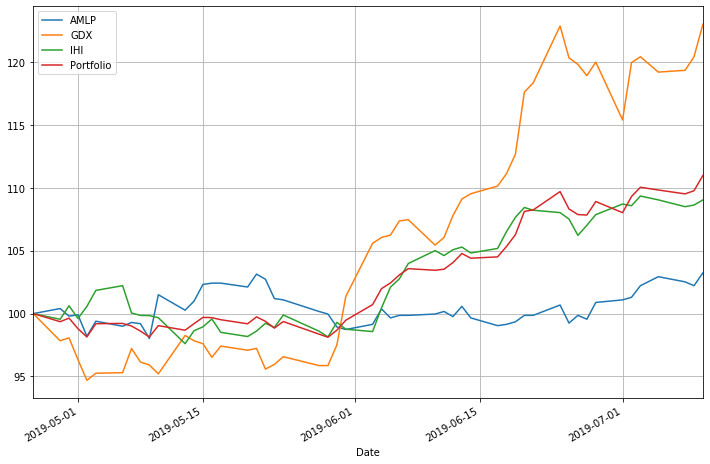

In [8]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['GDX', 'IHI', 'XAR', 'AMLP'])
ratio, *_ = quote.find_optimal_ratio()
print(ratio)
quote.graph(ratio)